# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 278
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [58, 54, 59, 54, 52, 59, 51, 53, 56, 52, 57, 53, 56, 58, 53, 57, 58, 54, 54, 56, 55, 56, 52, 53, 59, 57, 52, 51, 58, 54, 55, 52, 57, 59, 53, 53, 51, 52, 59, 59, 54, 59, 57, 59, 56, 51, 51, 52, 55, 55, 54, 51, 58, 57, 51, 53, 53, 59, 52, 57, 55, 54, 54, 56, 51, 52, 52, 58, 51, 51, 55, 57, 57, 59, 52, 56, 55, 58, 53, 53, 58, 51, 59, 52, 54, 51, 56, 54, 59, 53, 59, 53, 52, 58, 55, 57, 55, 53, 57, 56]
number of redexes= [3, 5, 9, 7, 5, 6, 5, 3, 9, 6, 6, 5, 4, 6, 6, 1, 8, 3, 10, 8, 4, 8, 7, 3, 9, 7, 7, 5, 6, 4, 7, 2, 5, 4, 3, 7, 5, 3, 7, 7, 8, 6, 5, 5, 5, 4, 7, 5, 7, 7, 6, 7, 5, 4, 1, 5, 7, 5, 3, 7, 4, 10, 5, 8, 5, 8, 9, 7, 4, 5, 6, 6, 5, 5, 5, 4, 2, 3, 4, 9, 8, 3, 7, 5, 4, 6, 5, 9, 3, 5, 9, 3, 6, 6, 6, 4, 7, 7, 7, 6]
number of steps to normalize using LO strategy= [4, 12, 6, 354, 5, 7, 1, 3, 2, 12, 10, 14, 12, 7, 5, 1, 101, 4, 8, 19, 5, 5, 3, 14, 8, 

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 354
max cound RI: 43
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 150
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostOutermostStrategy()]

explore_ep = 10  # total 10 * 2 (strat) = 20
epsilon = .1

In [5]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_greedy = run_greedy_policy(lambda_env,
                                               exploration=explore_ep,
                                               max_term_reward=max_count_steps_rlenv)

In [6]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_e_greedy = run_e_greedy_policy(lambda_env,
                                                   exploration=explore_ep,
                                                   max_term_reward=max_count_steps_rlenv,
                                                   epsilon=epsilon)

In [7]:
rewards_greedy = [max_count_steps_rlenv - rew for rew in rewards_greedy]
rewards_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]

In [10]:
comp_data = {"Greedy":   (rewards_greedy, "-"),
             "e-Greedy": (rewards_e_greedy, "-"),
             "LO":       (stepsLO, "-"),
             "RI":       (stepsRI, "-"),
             "Random":   (stepsRand, "-")}

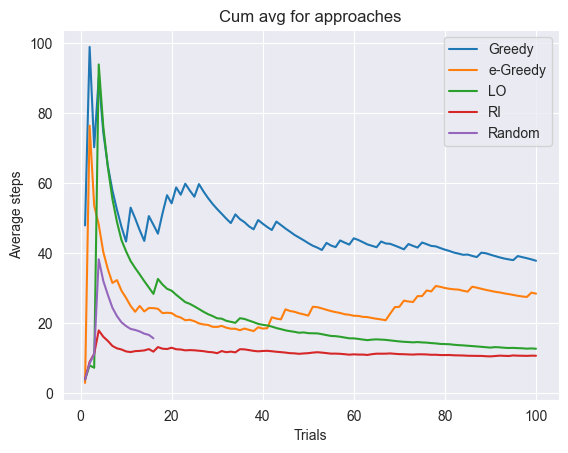

In [11]:
draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.02it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.023171  1204.577313 -823.188153     inf      0.183141   
chi2             0.029281  1137.713691 -799.782255     inf      0.284261   
gamma            0.029322  1151.878380 -799.641941     inf      0.255913   
exponpow         0.031653  1125.871721 -791.993745     inf      0.381968   
powerlaw         0.032773  1090.066675 -788.516795     inf      0.300277   

             ks_pvalue  
lognorm   2.083078e-03  
chi2      1.209826e-07  
gamma     2.912592e-06  
exponpow  1.250240e-13  
powerlaw  1.711355e-08  
{'lognorm': {'s': 1.3537348186116107, 'loc': -0.21897948490165114, 'scale': 14.505334138258032}}
Norm distribution: (37.91, 55.68143227324527)


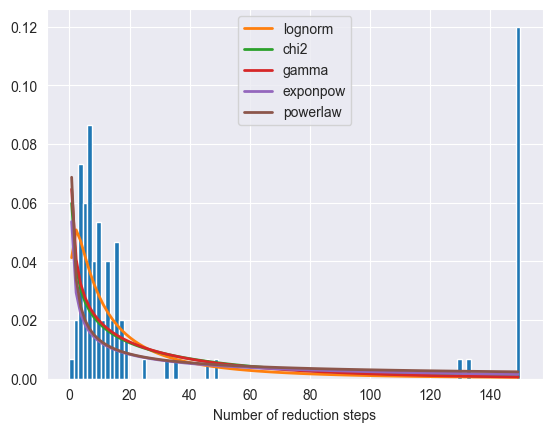

ValueError: autodetected range of [-inf, 5.0106352940962555] is not finite

In [12]:
draw_hist(rewards_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.88it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.012612  1249.208252 -884.011543     inf      0.110836   
gamma            0.018420  1190.177416 -846.132962     inf      0.178165   
chi2             0.020254  1126.013392 -836.643120     inf      0.273276   
exponpow         0.021677  1158.178171 -829.852301     inf      0.186969   
powerlaw         0.023006  1067.082734 -823.902692     inf      0.328441   

             ks_pvalue  
lognorm   1.588819e-01  
gamma     3.008121e-03  
chi2      4.329295e-07  
exponpow  1.558954e-03  
powerlaw  4.136332e-10  
{'lognorm': {'s': 1.257939735314772, 'loc': -0.23815900713963856, 'scale': 11.941312531084435}}
Norm distribution: (28.51, 46.02075510028057)


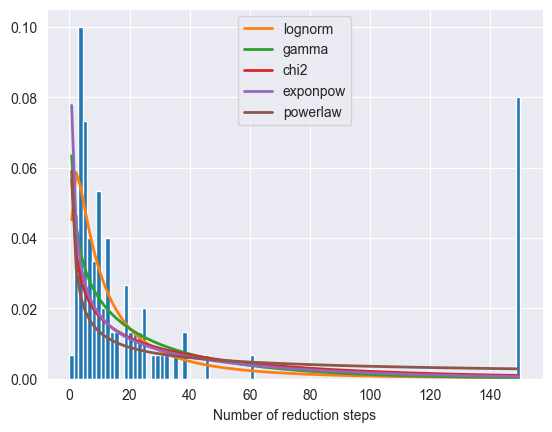

ValueError: autodetected range of [-inf, 5.0106352940962555] is not finite

In [13]:
draw_hist(rewards_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.67it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001704  2226.589497 -1084.202069     inf      0.103523   
chi2             0.006481  1608.114281  -950.582198     inf      0.299401   
exponpow         0.008969  1378.735153  -918.102882     inf      0.435733   
powerlaw         0.010363  1307.069682  -903.649731     inf      0.463900   
rayleigh         0.013418  3906.097702  -882.421916     inf      0.408063   

             ks_pvalue  
lognorm   2.184902e-01  
chi2      1.910213e-08  
exponpow  8.707052e-18  
powerlaw  3.144080e-20  
rayleigh  1.444974e-15  
{'lognorm': {'s': 0.9923198238508079, 'loc': 0.45990681715159143, 'scale': 5.992706662590166}}
Norm distribution: (12.77, 36.388969482523144)


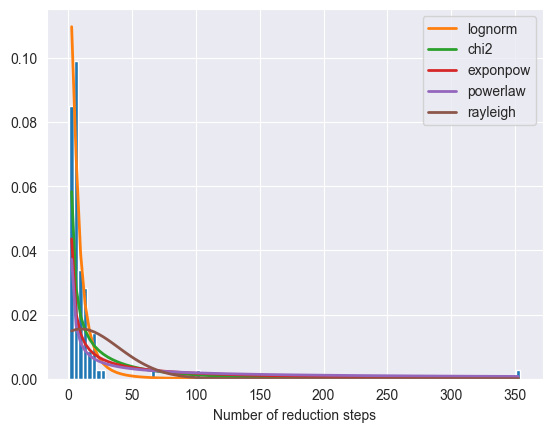

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.96it/s]


Log Norm distribution params: (1.8993802640233803, 0.8994081024574073); expected value = 10.012634358758325


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.64it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.249262   944.926055 -585.626606     inf      0.063335   
gamma            0.251961   955.368694 -584.549700     inf      0.087685   
rayleigh         0.263151  1037.385236 -584.809373     inf      0.173563   
norm             0.273667  1082.649433 -580.890846     inf      0.167667   
exponpow         0.275771   923.844541 -575.519869     inf      0.160000   

          ks_pvalue  
lognorm    0.793423  
gamma      0.402339  
rayleigh   0.004187  
norm       0.006314  
exponpow   0.010543  
{'lognorm': {'s': 0.5963960917690329, 'loc': -0.5916918259836544, 'scale': 9.496593574903887}}
Norm distribution: (10.77, 7.438891046385879)


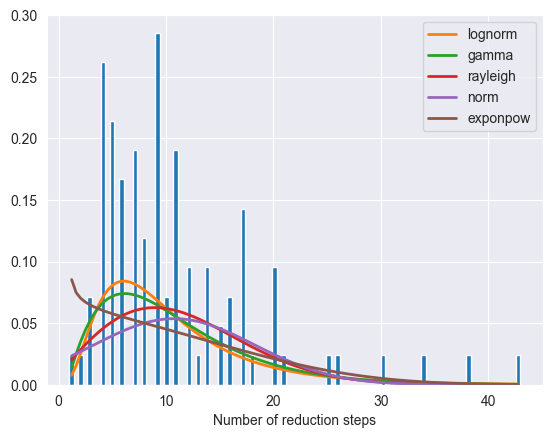

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.84it/s]


Log Norm distribution params: (2.1720267254839087, 0.6474204321766674); expected value = 10.822240621872194


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.57it/s]


number of not normalized terms: 3
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.006048  1576.661650 -925.496137     inf      0.059370   
chi2             0.010658  1841.187446 -870.542466     inf      0.103671   
rayleigh         0.023146  2601.897210 -799.892913     inf      0.248339   
exponpow         0.026232  2001.552125 -783.176320     inf      0.210092   
norm             0.028582  2638.479823 -779.429543     inf      0.243835   

          ks_pvalue  
lognorm    0.863509  
chi2       0.231573  
rayleigh   0.000009  
exponpow   0.000310  
norm       0.000015  
{'lognorm': {'s': 0.7665186695634865, 'loc': 0.31176832630180773, 'scale': 7.674730430488818}}
Norm distribution: (11.084536082474227, 13.633307759120074)


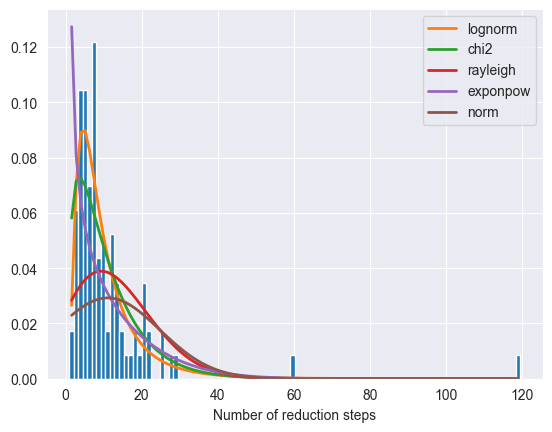

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.73it/s]

Log Norm distribution params: (2.089606146470065, 0.7296029587229075); expected value = 10.546208222811062


In [14]:
draw_hist(stepsLO)
draw_hist(stepsRI)
draw_hist(stepsRand)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.070721256244877


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 11.056845917824342


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.66it/s]


expected number of steps to normalize using Mixed strategy= 10.872013581251158


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 10.702617550195622


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 11.420912677685402


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.34it/s]


expected number of steps to normalize using Mixed strategy= 10.60156585949624


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 10.07746172620129


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.03it/s]


expected number of steps to normalize using Mixed strategy= 10.999991874192128


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 11.591266486797004


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.41it/s]


expected number of steps to normalize using Mixed strategy= 10.329375634669582


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.48it/s]


expected number of steps to normalize using Mixed strategy= 10.06836929849851


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.70it/s]


expected number of steps to normalize using Mixed strategy= 11.009041829048494


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.68it/s]


expected number of steps to normalize using Mixed strategy= 10.028424336930973


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.32it/s]


expected number of steps to normalize using Mixed strategy= 11.050992679865079


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.59it/s]


expected number of steps to normalize using Mixed strategy= 10.025060468457381


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 10.450427718368699


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 10.033634280129204


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.09it/s]


expected number of steps to normalize using Mixed strategy= 10.17090008498412


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.67it/s]


expected number of steps to normalize using Mixed strategy= 10.778721394387418


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.85it/s]


expected number of steps to normalize using Mixed strategy= 10.323064443161247
gen	nevals	min    	avg    
0  	20    	10.0251	10.5831


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 10.027275546823578


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.99it/s]


expected number of steps to normalize using Mixed strategy= 10.05937383889759


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 9.445765930987463


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


expected number of steps to normalize using Mixed strategy= 10.04076851594837


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 10.363956062192884


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.74it/s]


expected number of steps to normalize using Mixed strategy= 10.162284879362701


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 10.11239844712192


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.19it/s]


expected number of steps to normalize using Mixed strategy= 10.19847064057783


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.37it/s]


expected number of steps to normalize using Mixed strategy= 9.879940420960182


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.57it/s]


expected number of steps to normalize using Mixed strategy= 10.160715209768304


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.039696588422622


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.056041897091621


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.57it/s]


expected number of steps to normalize using Mixed strategy= 10.03378349662026


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 9.87424783010992
1  	14    	9.44577	12.567 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 10.056983616229395


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 10.037918101194686


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


expected number of steps to normalize using Mixed strategy= 10.02174804427574


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.60it/s]


expected number of steps to normalize using Mixed strategy= 9.911853624260589


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 10.031784817208528


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.48it/s]


expected number of steps to normalize using Mixed strategy= 10.576114128718867


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 10.018292744551914


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 10.065535912407398


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.09it/s]


expected number of steps to normalize using Mixed strategy= 10.020877643107765


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.72it/s]


expected number of steps to normalize using Mixed strategy= 10.035463875330228


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.50it/s]


expected number of steps to normalize using Mixed strategy= 10.450846839837594


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.048502475182785


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.042042203198088


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 10.474442482099322


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 9.920013106699159


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.59it/s]


expected number of steps to normalize using Mixed strategy= 10.020736898946165
2  	16    	9.87425	10.6336


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.84it/s]


expected number of steps to normalize using Mixed strategy= 10.056342684725468


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.02it/s]


expected number of steps to normalize using Mixed strategy= 10.01794976328641


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.78it/s]


expected number of steps to normalize using Mixed strategy= 10.546771616943222


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.34it/s]


expected number of steps to normalize using Mixed strategy= 10.066369392204901


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.31it/s]


expected number of steps to normalize using Mixed strategy= 9.972561922050527


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 10.499337590228306


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.96it/s]


expected number of steps to normalize using Mixed strategy= 10.009654416443134


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.74it/s]


expected number of steps to normalize using Mixed strategy= 10.031471965968548


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.61it/s]


expected number of steps to normalize using Mixed strategy= 10.020461457159211


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 10.02911914737667


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 9.810873882904184


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.37it/s]


expected number of steps to normalize using Mixed strategy= 10.087813258100093


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 9.958587564073536


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


expected number of steps to normalize using Mixed strategy= 10.022103979782084
3  	14    	9.81087	10.2346


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.02it/s]


expected number of steps to normalize using Mixed strategy= 10.475711242767627


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 9.901927877234277


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 10.043019530872645


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.73it/s]


expected number of steps to normalize using Mixed strategy= 10.01491266528688


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.75it/s]


expected number of steps to normalize using Mixed strategy= 10.064571885470109


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.83it/s]


expected number of steps to normalize using Mixed strategy= 10.542214566167434


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.94it/s]


expected number of steps to normalize using Mixed strategy= 9.906548145757466


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.612225856959288


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.94it/s]


expected number of steps to normalize using Mixed strategy= 10.422349266958028


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.19it/s]


expected number of steps to normalize using Mixed strategy= 10.006097317914127


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


expected number of steps to normalize using Mixed strategy= 9.867177028395776


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.57it/s]


expected number of steps to normalize using Mixed strategy= 10.444411716477981


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.29it/s]


expected number of steps to normalize using Mixed strategy= 10.691577161455562


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.25it/s]


expected number of steps to normalize using Mixed strategy= 9.948622290062126
4  	14    	9.61223	10.0864


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.53it/s]


expected number of steps to normalize using Mixed strategy= 10.22098666356899


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]


expected number of steps to normalize using Mixed strategy= 9.840257911835906


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


expected number of steps to normalize using Mixed strategy= 10.004277113327735


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.82it/s]


expected number of steps to normalize using Mixed strategy= 9.947745251434974


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 10.482068322639549


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.48it/s]


expected number of steps to normalize using Mixed strategy= 10.488573258471392


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.65it/s]


expected number of steps to normalize using Mixed strategy= 10.413054181289823


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 10.504629801284269


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 10.011234621417524


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


expected number of steps to normalize using Mixed strategy= 10.02636516971287


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.71it/s]


expected number of steps to normalize using Mixed strategy= 10.626234227713644


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 9.89603649745603


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.09it/s]


expected number of steps to normalize using Mixed strategy= 9.858828634512026


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 9.923135375293345


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.19it/s]


expected number of steps to normalize using Mixed strategy= 9.854249154279275


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.77it/s]


expected number of steps to normalize using Mixed strategy= 9.78753636901625
5  	16    	9.61223	10.1703


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.94it/s]


expected number of steps to normalize using Mixed strategy= 10.36906900320148


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.21it/s]


expected number of steps to normalize using Mixed strategy= 10.439122719866205


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.25it/s]


expected number of steps to normalize using Mixed strategy= 10.017157249969848


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.48it/s]


expected number of steps to normalize using Mixed strategy= 10.49138534706976


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.95it/s]


expected number of steps to normalize using Mixed strategy= 10.67056926979369


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.27it/s]


expected number of steps to normalize using Mixed strategy= 9.670531220654528


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.09it/s]


expected number of steps to normalize using Mixed strategy= 10.696482958812474


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.90it/s]


expected number of steps to normalize using Mixed strategy= 10.523991977253365


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 10.610469815147662


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.61it/s]


expected number of steps to normalize using Mixed strategy= 10.363173081765536


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 10.511885950422302


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.71it/s]


expected number of steps to normalize using Mixed strategy= 10.457616363667984


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 9.908387880291478


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 10.735305774542292


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


expected number of steps to normalize using Mixed strategy= 10.671047879864256
6  	15    	9.61223	10.251 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 10.611604853435791


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.85it/s]


expected number of steps to normalize using Mixed strategy= 10.243541669623347


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 9.76119708008582


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 10.388438302591283


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.66it/s]


expected number of steps to normalize using Mixed strategy= 9.99111085332508


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.21it/s]


expected number of steps to normalize using Mixed strategy= 9.767537698004693


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 10.284617084345992


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


expected number of steps to normalize using Mixed strategy= 10.02383891110434


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 9.641286563243597


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.29it/s]


expected number of steps to normalize using Mixed strategy= 9.831311370760556


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 9.721976415061231


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 10.25250154658926


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.57it/s]


expected number of steps to normalize using Mixed strategy= 10.467011303197483


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.486713005270003


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.82it/s]


expected number of steps to normalize using Mixed strategy= 9.782754790706123
7  	15    	9.61223	9.99144
- Best solution is: 
p =  [0.7854853083828961, 0.014200029857984707, 0.034173998524844464, 0.014581146126816893]


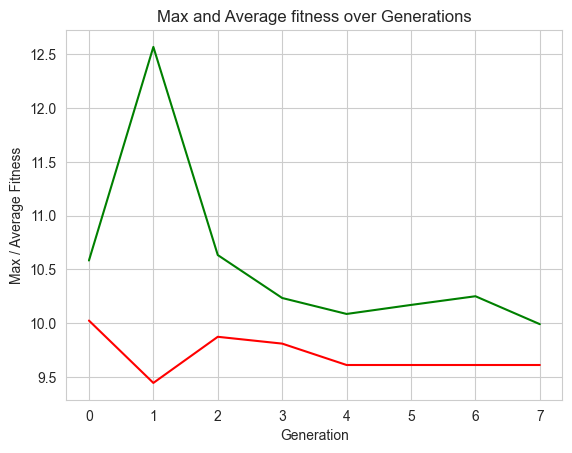

In [15]:
STRATEGIES = [LeftmostOutermostStrategy(), RightmostInnermostStrategy(), LeftmostInnermostStrategy(),
              RightmostOutermostStrategy(), RandomStrategy()]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [1.0, 1.0, 1.0, 1.0, ]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register("hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (toolbox.__getattribute__("hyperparameter_" + str(i)),)


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in
                  range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
    steps = list(filter(lambda x: x != float('inf'), steps))

    distributions = get_common_distributions()
    distributions.remove('expon')
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    print("expected number of steps to normalize using Mixed strategy= {}".format(result))
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return result,


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR,
                 indpb=1.0 / NUM_OF_PARAMS)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.18it/s]


number of not normalized terms: 1
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001189  2094.956601 -1107.883884     inf      0.070615   
gamma            0.005964  2153.940635  -948.212290     inf      0.190880   
chi2             0.008151  1608.779082  -917.287405     inf      0.227228   
exponpow         0.011101  1341.731468  -886.706953     inf      0.365602   
powerlaw         0.014815  1204.623538  -858.128257     inf      0.481187   

             ks_pvalue  
lognorm   6.801439e-01  
gamma     1.239989e-03  
chi2      5.652116e-05  
exponpow  2.273092e-12  
powerlaw  1.308044e-21  
{'lognorm': {'s': 0.8739087283747001, 'loc': 0.29857081280099373, 'scale': 6.406985843096795}}
Norm distribution: (11.019191919191918, 24.47229799270953)


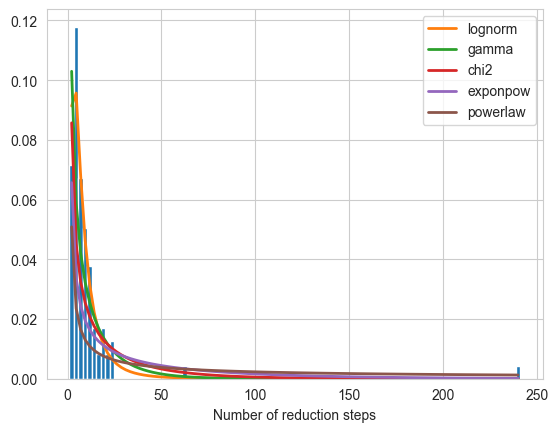

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.63it/s]

Log Norm distribution params: (1.920872517232663, 0.8226494740898624); expected value = 9.575891098393829


In [16]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.48it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.000855  2203.741279 -1153.161146     inf      0.100767   
gamma            0.002784  2400.077135 -1035.084116     inf      0.235023   
chi2             0.005506  1583.592451  -966.900383     inf      0.306317   
exponpow         0.007938  1376.864593  -930.308155     inf      0.421395   
rayleigh         0.012557  3865.051451  -889.055198     inf      0.402335   

             ks_pvalue  
lognorm   2.449298e-01  
gamma     2.423715e-05  
chi2      7.942523e-09  
exponpow  1.294013e-16  
rayleigh  3.961421e-15  
{'lognorm': {'s': 0.9858009738815781, 'loc': 0.4450120703237036, 'scale': 6.05385948321221}}
Norm distribution: (12.687499999999998, 35.2500045212763)


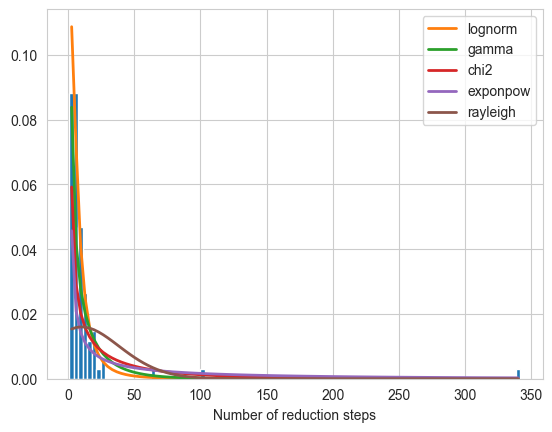

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.61it/s]

Log Norm distribution params: (1.9049611559954889, 0.896779500693141); expected value = 10.044928622093922


In [17]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(steps)

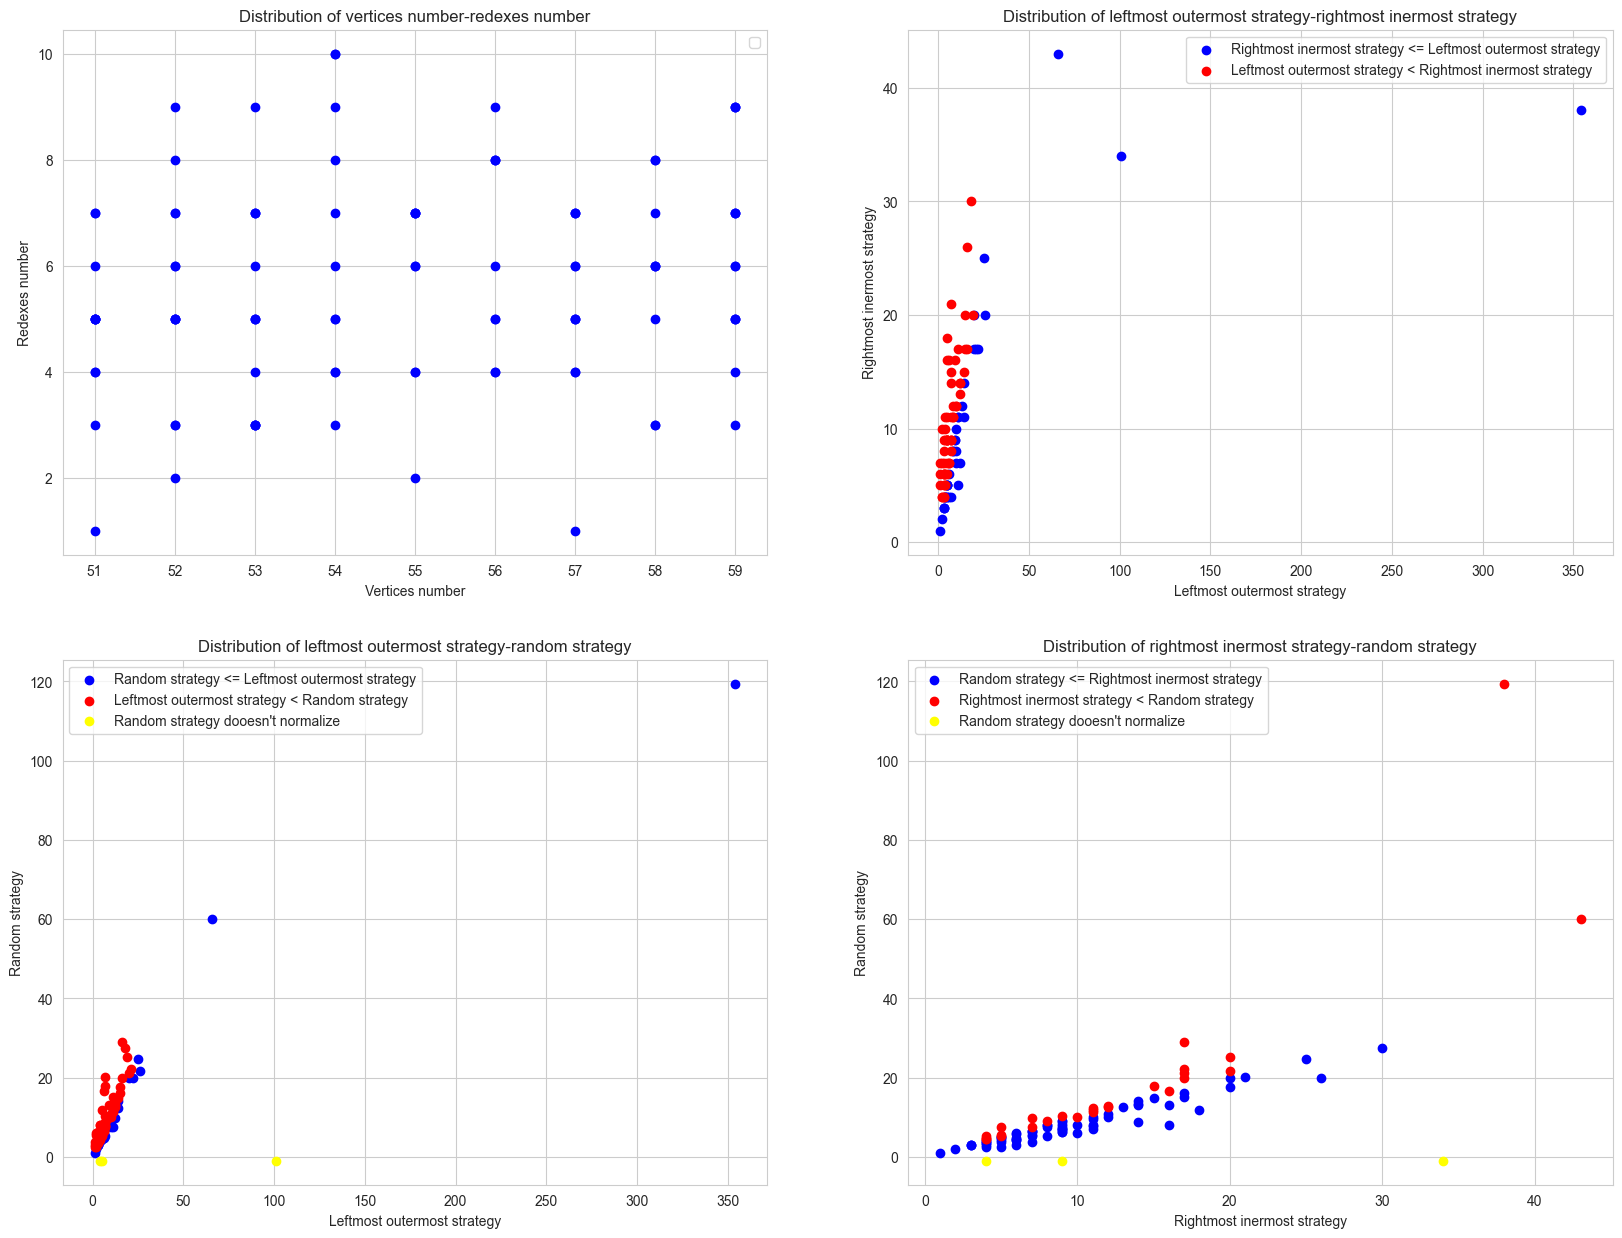

In [18]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(ax0, countVertices, countRedexes, 'Vertices number', 'Redexes number')
draw_2d_strategy_distribution(ax1, stepsLO, stepsRI, 'Leftmost outermost strategy', 'Rightmost inermost strategy')
draw_2d_strategy_distribution(ax2, stepsLO, stepsRand, 'Leftmost outermost strategy', 'Random strategy')
draw_2d_strategy_distribution(ax3, stepsRI, stepsRand, 'Rightmost inermost strategy', 'Random strategy')
plt.show()

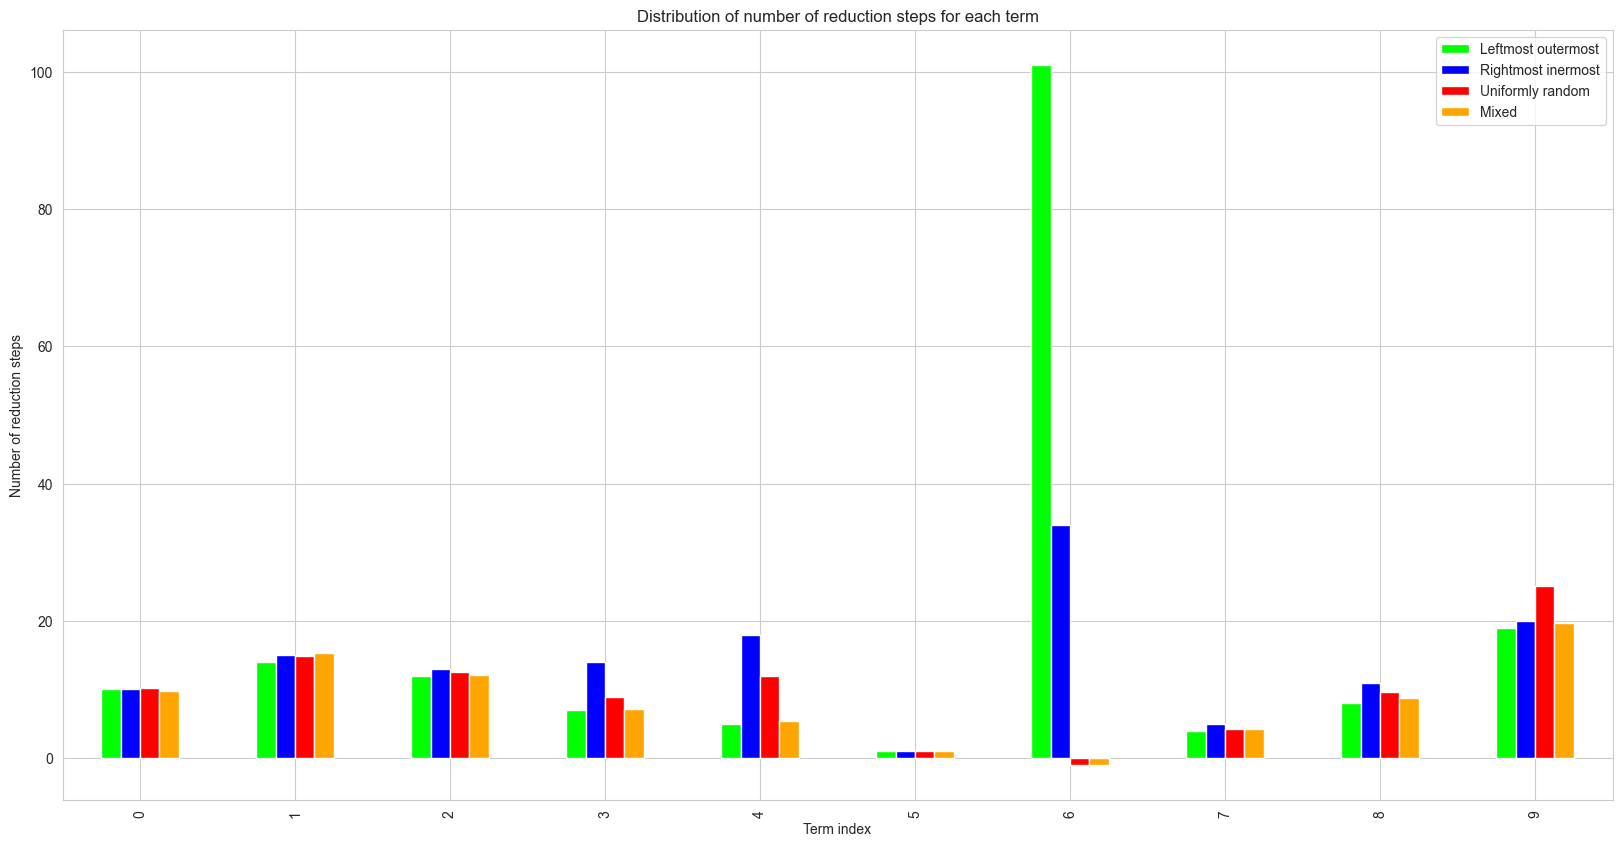

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [19]:
colors = ['lime', 'blue', 'red', 'orange']
labels = ['Leftmost outermost', 'Rightmost inermost', 'Uniformly random', 'Mixed']
n = 20
draw_plot(stepsLO[10:n], stepsRI[10:n], stepsRand[10:n], MixedStrategySteps[10:n], labels, colors)

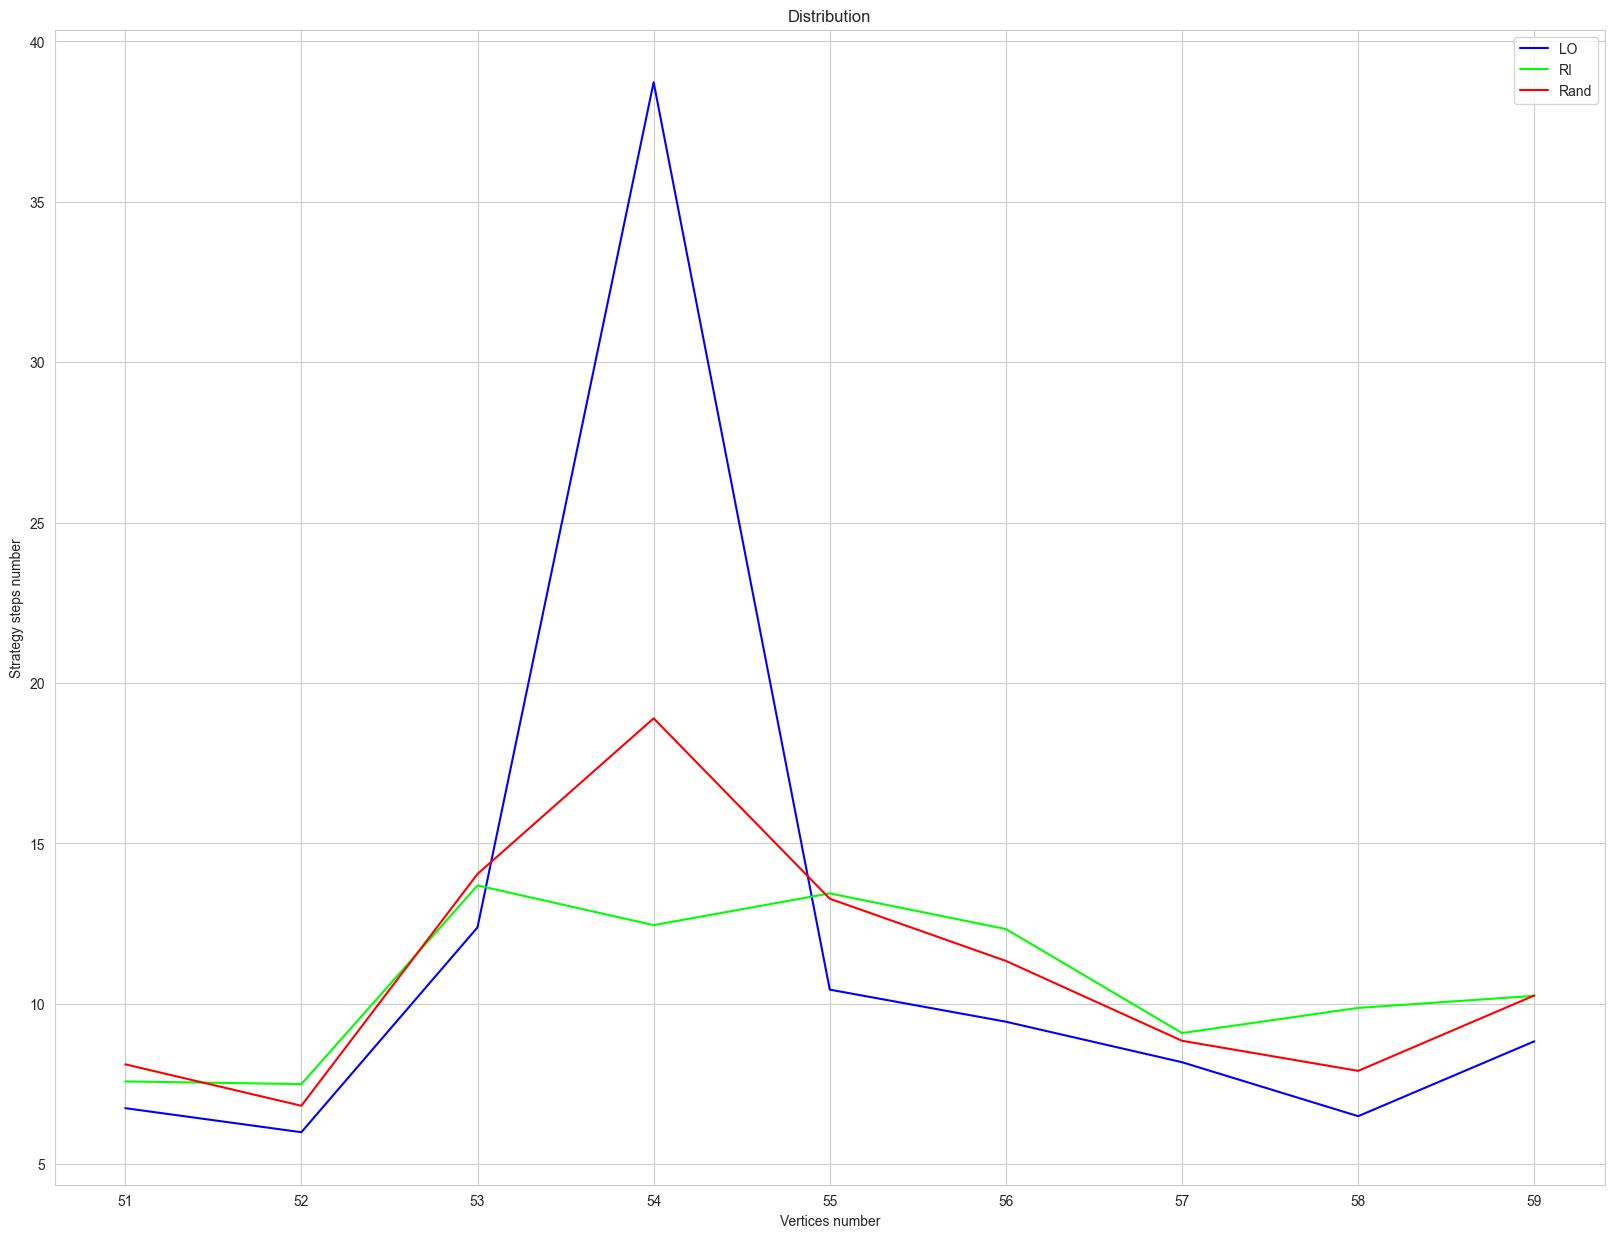

In [20]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append((term, {'LO': stepsLO[i], 'RI': stepsRI[i], 'Rand': stepsRand[i]}))

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [d[1] for d in data if
                        d[1]['LO'] != float('inf') and d[1]['RI'] != float('inf') and d[1]['Rand'] != float('inf')]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d['LO']
        avgRI += d['RI']
        avgRand += d['Rand']

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {'LO': avgLO / count, 'RI': avgRI / count, 'Rand': avgRand / count}

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(list(average_term_data.keys()), [data['LO'] for i, data in average_term_data.items()], color='blue', label='LO')
ax.plot(list(average_term_data.keys()), [data['RI'] for i, data in average_term_data.items()], color='lime', label='RI')
ax.plot(list(average_term_data.keys()), [data['Rand'] for i, data in average_term_data.items()], color='red',
        label='Rand')
ax.set(title='Distribution',
       xlabel='Vertices number',
       ylabel='Strategy steps number')
ax.legend(prop={'size': 10})

plt.show()

## TESTS

In [21]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX),
                Abstraction(x, Application(Abstraction(y, Z),
                                           XZ
                                           ))
                )

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[5399450] => ((v[5399450] v[5399450]) v[5399450])) (fun v[5399450] => ((fun v[5399451] => v[5399452]) (v[5399450] v[5399452]))))
	v[5399450]: {'free': 0, 'bound': 4}
	v[5399452]: {'free': 2, 'bound': 0}


In [22]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(x,
                         Abstraction(y,
                                     Application(
                                         Application(
                                             Abstraction(z, Application(Atom(y), Atom(z))),
                                             Application(Abstraction(w, Atom(w)), Atom(w))),
                                         Atom(v))))


def testTerm():
    assert (len(lambdaTerm.redexes) == 2)
    assert (lambdaTerm.verticesNumber == 13)

    subterm = Application(Atom(y), Atom(z))
    assert (lambdaTerm.subterm(1) == lambdaTerm)
    assert (lambdaTerm.subterm(6) == subterm)
    assert (lambdaTerm.setSubterm(1, subterm) == subterm)

    assert (lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber)
    assert (len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes))

    strategy = LeftmostOutermostStrategy()
    assert (len(lambdaTerm._betaConversion(strategy).redexes) == 1)
    assert (lambdaTerm._betaConversion(strategy).verticesNumber == 10)

    assert (len(lambdaTerm.normalize(strategy)[0].redexes) == 0)
    assert (lambdaTerm.normalize(strategy)[1] == 2)


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert (strategy.redexIndex(lambdaTerm) == 4)


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.30it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.012193  1477.749340 -877.417859     inf      0.084982   
rayleigh         0.029849  2385.520255 -793.376374     inf      0.252841   
chi2             0.031679  1524.247672 -782.889562     inf      0.193042   
norm             0.037473  2407.590133 -770.855699     inf      0.248031   
exponpow         0.038207  1063.853311 -764.339724     inf      0.349808   

             ks_pvalue  
lognorm   4.475560e-01  
rayleigh  4.582659e-06  
chi2      1.047991e-03  
norm      7.504653e-06  
exponpow  2.468859e-11  
{'lognorm': {'s': 0.8354964542370591, 'loc': 0.14277515615644926, 'scale': 6.220273608879113}}
Norm distribution: (9.323232323232324, 12.227496983495005)


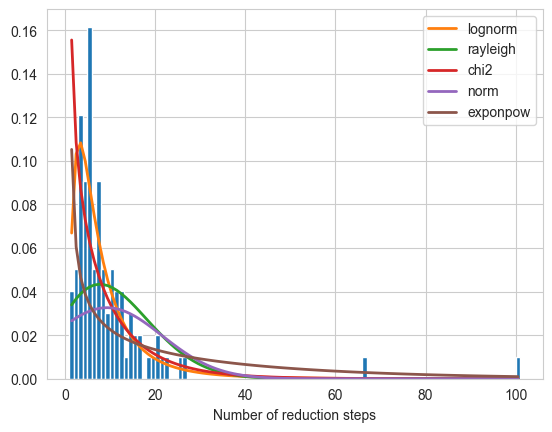

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.97it/s]

Log Norm distribution params: (1.859280095850548, 0.8101256976323012); expected value = 8.912296201014769


In [23]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.29it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.012193  1477.749340 -877.417859     inf      0.084982   
rayleigh         0.029849  2385.520255 -793.376374     inf      0.252841   
chi2             0.031679  1524.247672 -782.889562     inf      0.193042   
norm             0.037473  2407.590133 -770.855699     inf      0.248031   
exponpow         0.038207  1063.853311 -764.339724     inf      0.349808   

             ks_pvalue  
lognorm   4.475560e-01  
rayleigh  4.582659e-06  
chi2      1.047991e-03  
norm      7.504653e-06  
exponpow  2.468859e-11  
{'lognorm': {'s': 0.8354964542370591, 'loc': 0.14277515615644926, 'scale': 6.220273608879113}}
Norm distribution: (9.323232323232324, 12.227496983495005)


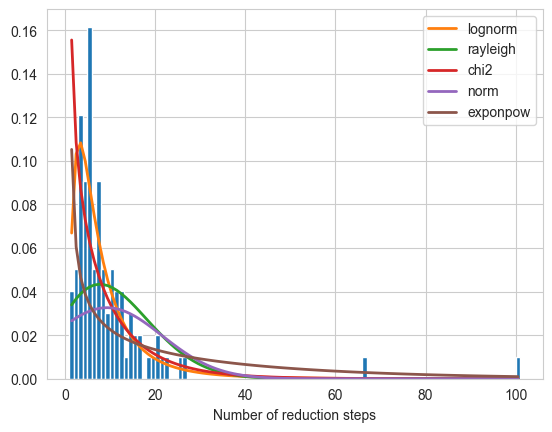

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.64it/s]

Log Norm distribution params: (1.859280095850548, 0.8101256976323012); expected value = 8.912296201014769


In [24]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)